In [16]:
import pandas as pd
import matplotlib.pyplot as plt


# Load datasets

In [17]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Check for missing values

In [18]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [20]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Merge transactions with customers and products

In [24]:
mergedata = transactions.merge(customers, on='CustomerID', how='left')
mergedata = transaction_details.merge(products, on='ProductID', how='left')


In [25]:
print(mergedata.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                     ProductName_x   Category_x  Price_y  \
0  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1  ComfortLiving Bluetooth Speak

# Number of transactions by region

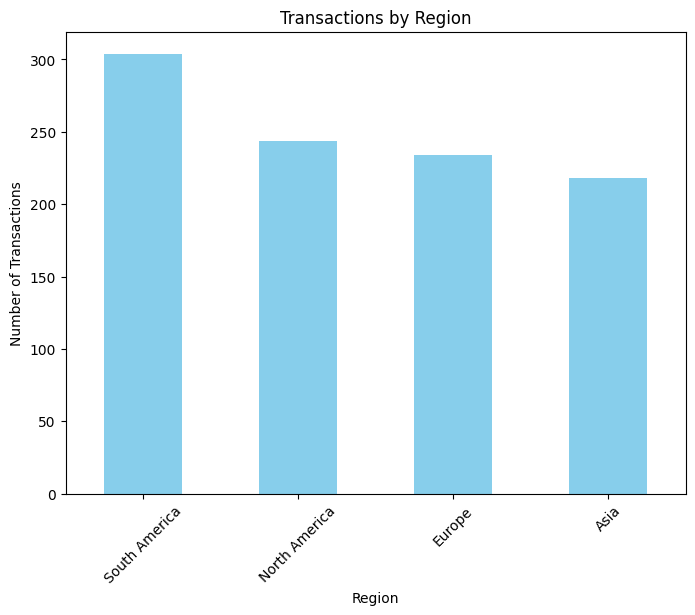

In [26]:
region_counts = transaction_details['Region'].value_counts()

plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


# Total sales by product category

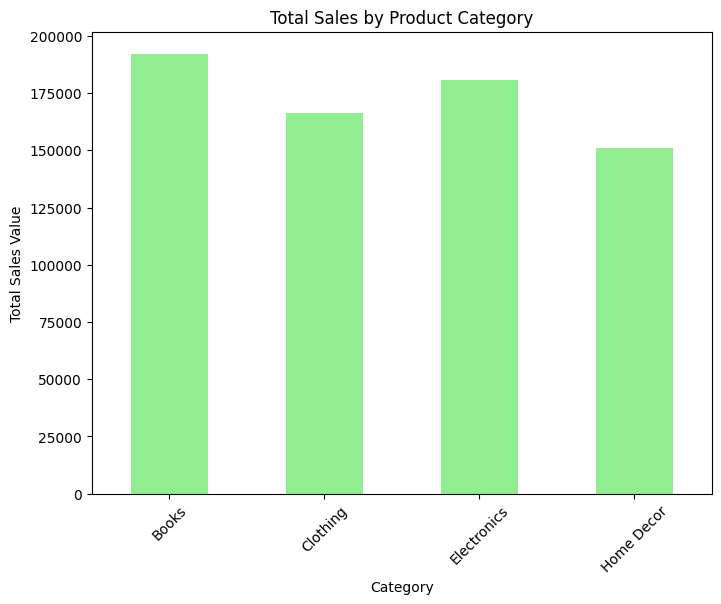

In [28]:
category_sales = transaction_details.groupby('Category')['TotalValue'].sum()

plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

# Average transaction amount by region

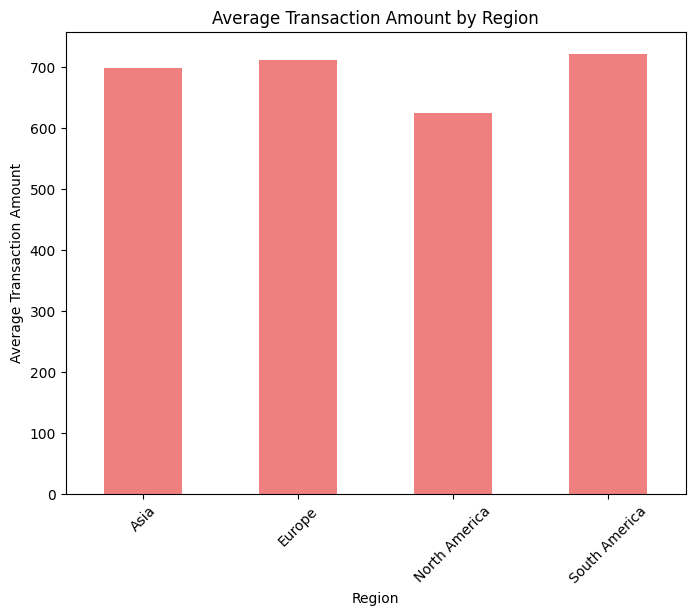

In [29]:
avg_transaction_region = transaction_details.groupby('Region')['TotalValue'].mean()

plt.figure(figsize=(8, 6))
avg_transaction_region.plot(kind='bar', color='lightcoral')
plt.title('Average Transaction Amount by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.show()

# Top 5 customers by total sales

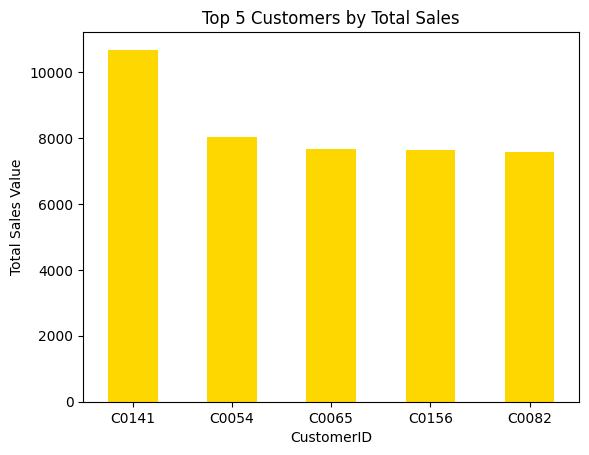

In [30]:
top_customers = transaction_details.groupby('CustomerID')['TotalValue'].sum().nlargest(5)

top_customers.plot(kind='bar', color='gold')
plt.title('Top 5 Customers by Total Sales')
plt.xlabel('CustomerID')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=0)
plt.show()